Cálculo Variacional de Estado Fundamental Hidrógeno 

In [160]:
from numpy import  linspace, zeros, array, pi, exp
from scipy.linalg import  eigh , eigvalsh
import sympy as sp

%matplotlib inline
from matplotlib.pyplot import plot, title, legend, show, axhline, \
                              xlabel, ylabel, axis, figure
    
import matplotlib.pyplot as plt

In [161]:
#Función radial hidrogénica (con hipergeométricas)
#Esta es la R grande, R=u/r

def R_hyp(n,l,z,r):
    rho = 2*r*z/n
    rnum = (2*z/n)**3 * sp.factorial(n+l)
    rden = (sp.factorial(2*l+1))**2 * 2*n * sp.factorial(n-l-1)
    rnorm = sp.sqrt(rnum/rden)
    
    #if -n+l+1 == 0:
    #    rfunc = (rho)**l * sp.exp(-rho/2)
    #else:
    rfunc = (rho)**l * sp.exp(-rho/2) * sp.hyper((-n+l+1,),(2*l+2,),(rho))
        
    R = rnorm * rfunc
    return R

In [162]:
nsize = 4
S = zeros((nsize,nsize))
H = zeros((nsize,nsize))
Alpha = zeros((nsize))
Ci = zeros((nsize))

In [163]:
# Datos Iniciales para variacional
Alpha[0] = 13.00773
Alpha[1] = 1.962079
Alpha[2] = 0.444529
Alpha[3] = 0.1219492

#Alpha[4] = 20.0
#Alpha[5] = 8.0
#Alpha[6] = 1.0
#Alpha[7] = 0.05

In [164]:
# Cálculo de Overlaps  Sij=<xi|xj>

def overlap(Alpha,p,q):
    spq = ( pi / (Alpha[p] + Alpha[q]) )**(3./2.)
    
    return spq

for i in range(0,nsize):
    for j in range(i,nsize):        
        S[i,j]=overlap(Alpha,i,j)
        S[j,i]=S[i,j]


In [165]:
S

array([[4.19640644e-02, 9.61391815e-02, 1.12857904e-01, 1.17042513e-01],
       [9.61391815e-02, 7.16316708e-01, 1.49147774e+00, 1.85084232e+00],
       [1.12857904e-01, 1.49147774e+00, 6.64247101e+00, 1.30602054e+01],
       [1.17042513e-01, 1.85084232e+00, 1.30602054e+01, 4.62286682e+01]])

In [166]:
 # Cálculo de Hamiltoniano Hij=<xi| H |xj>


# Cálculo de Energía Cinética  Tij=<xi|-1/2 D^2 |xj>
def Tkin(Alpha,p,q):
    rnum = 3 * pi**(3./2.) * Alpha[p] * Alpha[q]
    rden =  (Alpha[p] + Alpha[q] )**(5./2.)    
    Tpq = rnum/rden    
    return Tpq


# Cálculo de Energía Potencial  Vij=<xi|-Z/r |xj>
def Vpot(Alpha,p,q):
    Vpq =  ( -2*pi )  /  (Alpha[p] + Alpha[q])    
    return Vpq

for i in range(0,nsize):
    for j in range(i,nsize): 
        H[i,j]=Tkin(Alpha,i,j) + Vpot(Alpha,i,j)
        H[j,i]=H[i,j]
   

In [167]:
H

array([[  0.57726847,   0.07200247,  -0.3215405 ,  -0.43612626],
       [  0.07200247,   0.50704993,  -0.98918483,  -2.37741992],
       [ -0.3215405 ,  -0.98918483,  -2.63808243,  -7.34221693],
       [ -0.43612626,  -2.37741992,  -7.34221693, -17.30516271]])

In [168]:
# Solución generalized eigenvalues (H-ES)(C)=0
# Sólo Autovalores !

Ener = eigvalsh(H,S,type=1)
Ener

array([-0.49927841,  0.11321392,  2.59229957, 21.14436519])

In [169]:
Ener[0]

-0.49927840566748544

In [178]:
# Solución generalized eigenvalues (H-ES)(C)=0

Ener,coef = eigh(H,S,type=1)
Ci = coef[:,0] #Ci es un array
Ci

array([-0.09610152, -0.16301717, -0.18558699, -0.07370076])

In [171]:
def psi(Ci,Alpha,x):
    from math import  exp
    nsize = len(Ci) 
    sum = 0.0
    for i in range(0,nsize):
        sum = sum + Ci[i]*exp(-Alpha[i]*x**2)
    return sum

In [172]:
# array definitions
npts = 100
xmin=0.0
xmax=4.0
x = linspace(xmin,xmax,npts)
wave1s = zeros(npts)
wave1steo = zeros(npts)

In [192]:
for i in range(0,npts):
        wave1s[i] = psi(abs(Ci),Alpha,x[i])

        wave1steo[i] = R_hyp(1,0,1,x[i])

In [196]:
#Normalizo la funcion de onda wave1s

from scipy.integrate import simps

norm = 0
#norm = simps(wave1s, x, dx=1, axis=-1, even='avg')
norm = simps(wave1s, x, even='avg')
wave1s = wave1s/norm
#print(simps(wave1s, x, even='avg'))
wave1s = wave1s*simps(wave1steo, x, even='avg')

#print(simps(wave1steo, x, even='avg'))
#print(simps(wave1s, x, even='avg'))

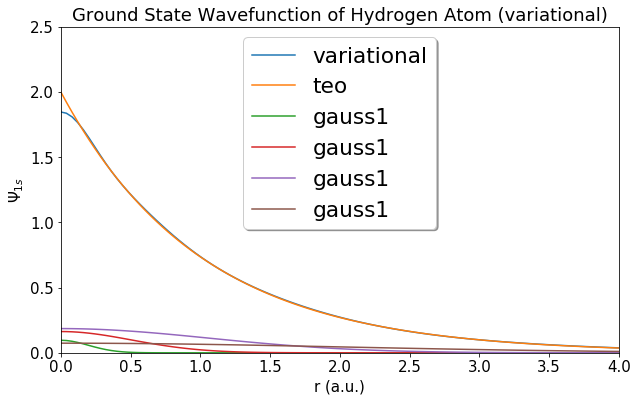

In [197]:
figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})

plot(x,wave1s,label='variational');
plot(x,wave1steo,label='teo');

for i in range(0,nsize):
    plot(x,-Ci[i]*exp(-Alpha[i]*x**2),label='gauss1');

legend(loc='upper center', shadow=True, fontsize='x-large')

axis([xmin,xmax,0,2.5]);
title("Ground State Wavefunction of Hydrogen Atom (variational)");
xlabel("r (a.u.)");
ylabel("$\Psi_{1s}$",size=15);